In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
import nltk

import pickle

In [2]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['text_lemma'], df['Hate'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,tokenized_text,text_lemma,pos_tags,Hate
0,5.969655e+17,i just found the perfect rental why cant my le...,Neither,"['found', 'perfect', 'rental', 'cant', 'lease'...","['found', 'perfect', 'rental', 'cant', 'lease'...","['i_NN', 'just_RB', 'found_VBD', 'the_DT', 'pe...",0
1,5.758918e+17,every time they discover anything its either ...,Neither,"['every', 'time', 'discover', 'anything', 'eit...","['every', 'time', 'discover', 'anything', 'eit...","['every_DT', 'time_NN', 'they_PRP', 'discover_...",0
2,5.952595e+17,ok time to write code bbl\n\nmaking a new thing,Neither,"['ok', 'time', 'write', 'code', 'bbl', 'making...","['ok', 'time', 'write', 'code', 'bbl', 'making...","['ok_JJ', 'time_NN', 'to_TO', 'write_VB', 'cod...",0
3,5.723449e+17,refined dessert not mkr,Neither,"['refined', 'dessert', 'mkr']","['refined', 'dessert', 'mkr']","['refined_VBN', 'dessert_NN', 'not_RB', 'mkr_VB']",0
4,5.681320e+17,one of the best things anyone can do to impr...,Neither,"['one', 'best', 'things', 'anyone', 'improve',...","['one', 'best', 'thing', 'anyone', 'improve', ...","['one_CD', 'of_IN', 'the_DT', 'best_JJS', 'thi...",0


In [3]:
#create Count matrix
count = CountVectorizer()
count_train = count.fit_transform(X_train)
count_test = count.transform(X_test)

## Default NB

In [4]:
default_NB = GaussianNB(var_smoothing=1e-9)

In [5]:
# train classifier
print("training...")
default_NB.fit(count_train.toarray(), y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
default_NB_test_preds = default_NB.predict(count_test.toarray())
print("complete.")

# save the model to disk
filename = 'default_NB.sav'
pickle.dump(default_NB, open(filename, 'wb'))

training...
complete.
predicting...
complete.


In [6]:
NB_metrics = {}
default_NB_precision = precision_score(y_test, default_NB_test_preds)
default_NB_recall = recall_score(y_test, default_NB_test_preds)
default_NB_macro_f1_score = f1_score(y_test, default_NB_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(default_NB_precision))
print('Recall: {:.3}'.format(default_NB_recall))
print('Macro F1 Score: {:.3}'.format(default_NB_macro_f1_score))

NB_metrics['Default NB'] = {'precision': default_NB_precision, 'recall': default_NB_recall, 
                            'macro_f1': default_NB_macro_f1_score}

Model evaluation metrics
Precision: 0.307
Recall: 0.581
Macro F1 Score: 0.609


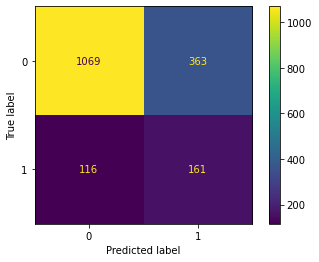

In [7]:
plot_confusion_matrix(default_NB, count_test.toarray(), y_test)

## Grid NB

In [8]:
grid_NB = GaussianNB()

grid_search_params = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_NB = GridSearchCV(grid_NB, grid_search_params, cv=5, scoring='f1_macro', verbose=3)

grid_NB.fit(count_train.toarray(), y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... var_smoothing=1.0, score=0.756, total=   1.0s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.758, total=   0.9s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.678, total=   0.9s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.781, total=   0.9s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.767, total=   0.9s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.781, total=   0.9s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.763, total=   0.9s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.747, total=   0.9s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.781, total=   0.9s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .

[CV] ... var_smoothing=0.08111308307896872, score=0.526, total=   0.9s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.597, total=   0.9s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.609, total=   0.9s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.544, total=   0.9s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.521, total=   0.9s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.517, total=   0.9s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.585, total=   0.9s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .

[CV] .. var_smoothing=0.008111308307896872, score=0.535, total=   0.9s
[CV] var_smoothing=0.008111308307896872 ..............................
[CV] .. var_smoothing=0.008111308307896872, score=0.528, total=   0.9s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.537, total=   0.9s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.576, total=   0.9s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.545, total=   0.9s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.545, total=   0.9s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.540, total=   0.9s
[CV] var_smoothing=0.005336699231206307 ..............................
[CV] .

[CV] . var_smoothing=0.0006579332246575676, score=0.630, total=   0.9s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.603, total=   0.9s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.581, total=   0.9s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.604, total=   0.9s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.584, total=   0.9s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.630, total=   0.9s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.603, total=   0.9s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] .

[CV] . var_smoothing=6.579332246575683e-05, score=0.605, total=   0.9s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.584, total=   0.9s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.628, total=   0.9s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.604, total=   0.9s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.575, total=   0.9s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.605, total=   0.9s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.584, total=   0.9s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] .

[CV] . var_smoothing=5.336699231206313e-06, score=0.604, total=   0.9s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.575, total=   0.9s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.605, total=   0.9s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.584, total=   0.9s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.628, total=   0.9s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.604, total=   0.9s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.575, total=   0.9s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] .

[CV]  var_smoothing=4.3287612810830526e-07, score=0.584, total=   0.9s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.628, total=   0.9s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.604, total=   0.9s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.575, total=   0.9s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.605, total=   0.9s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.584, total=   0.9s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.628, total=   0.9s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  

[CV]  var_smoothing=4.3287612810830526e-08, score=0.575, total=   0.9s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV]  var_smoothing=4.3287612810830526e-08, score=0.605, total=   0.9s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.584, total=   0.9s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.628, total=   0.9s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.604, total=   0.9s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.575, total=   0.9s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.605, total=   0.9s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .

[CV]  var_smoothing=3.5111917342151273e-09, score=0.628, total=   0.9s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.604, total=   0.9s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.575, total=   0.9s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.605, total=   0.9s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.584, total=   0.9s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.628, total=   0.9s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.604, total=   0.9s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.7min finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro', verbose=3)

In [9]:
#print best score obtained and the parameters which obtained it
print('F1 Score:', grid_NB.best_score_)
print('Best Hyperparameters:', grid_NB.best_params_)
print('Model object with best parameters: ')
print(grid_NB.best_estimator_)

F1 Score: 0.7892035927288381
Best Hyperparameters: {'var_smoothing': 0.533669923120631}
Model object with best parameters: 
GaussianNB(var_smoothing=0.533669923120631)


In [10]:
# train classifier
print("training...")
grid_NB.best_estimator_.fit(count_train.toarray(), y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
NB_test_preds = grid_NB.best_estimator_.predict(count_test.toarray())
print("complete.")

# save the model to disk
filename = 'grid_NB.sav'
pickle.dump(grid_NB.best_estimator_, open(filename, 'wb'))

training...
complete.
predicting...
complete.


In [11]:
grid_NB_precision = precision_score(y_test, NB_test_preds)
grid_NB_recall = recall_score(y_test, NB_test_preds)
grid_NB_macro_f1_score = f1_score(y_test, NB_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_NB_precision))
print('Recall: {:.3}'.format(grid_NB_recall))
print('Macro F1 Score: {:.3}'.format(grid_NB_macro_f1_score))

NB_metrics['Grid NB'] = {'precision': grid_NB_precision, 'recall': grid_NB_recall, 
                            'macro_f1': grid_NB_macro_f1_score}

Model evaluation metrics
Precision: 0.668
Recall: 0.726
Macro F1 Score: 0.817


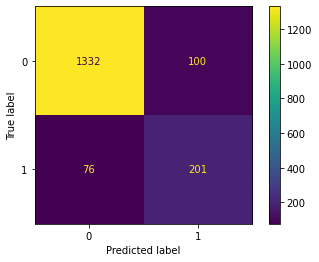

In [12]:
plot_confusion_matrix(grid_NB, count_test.toarray(), y_test)

## Default NB with POS

In [13]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df['pos_tags'], df['Hate'], test_size=0.25, random_state=12)
                                                       
count_train_pos = count.fit_transform(X_train_pos)
count_test_pos = count.transform(X_test_pos)

In [14]:
default_NB_POS = GaussianNB(var_smoothing=1e-9)

In [15]:
# train classifier
print("training...")
default_NB_POS.fit(count_train_pos.toarray(), y_train_pos)
print("complete.")
# use classifier to predict on test set
print("predicting...")
default_NB_POS_test_preds = default_NB_POS.predict(count_test_pos.toarray())
print("complete.")

# save the model to disk
filename = 'default_NB_POS.sav'
pickle.dump(default_NB_POS, open(filename, 'wb'))

training...
complete.
predicting...
complete.


In [16]:
default_NB_POS_precision = precision_score(y_test_pos, default_NB_POS_test_preds)
default_NB_POS_recall = recall_score(y_test_pos, default_NB_POS_test_preds)
default_NB_POS_macro_f1_score = f1_score(y_test_pos, default_NB_POS_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(default_NB_POS_precision))
print('Recall: {:.3}'.format(default_NB_POS_recall))
print('Macro F1 Score: {:.3}'.format(default_NB_POS_macro_f1_score))

NB_metrics['Default NB with POS'] = {'precision': default_NB_POS_precision, 'recall': default_NB_POS_recall, 
                            'macro_f1': default_NB_POS_macro_f1_score}

Model evaluation metrics
Precision: 0.319
Recall: 0.495
Macro F1 Score: 0.614


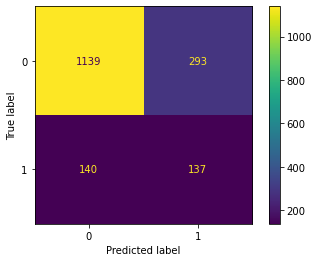

In [17]:
plot_confusion_matrix(default_NB_POS, count_test_pos.toarray(), y_test_pos)

## Grid NB with POS

In [18]:
grid_NB = GaussianNB()

grid_search_params = {'var_smoothing': np.logspace(0,-9, num=100)}
POS_grid_NB = GridSearchCV(grid_NB, grid_search_params, cv=5, scoring='f1_macro', verbose=3)

POS_grid_NB.fit(count_train_pos.toarray(), y_train_pos)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... var_smoothing=1.0, score=0.463, total=   1.4s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.469, total=   1.3s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.457, total=   1.3s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.463, total=   1.3s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.474, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.498, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.504, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.469, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.537, total=   1.3s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .

[CV] ... var_smoothing=0.08111308307896872, score=0.579, total=   1.3s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.669, total=   1.3s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.677, total=   1.3s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.599, total=   1.3s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.551, total=   1.3s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.566, total=   1.3s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.651, total=   1.3s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .

[CV] .. var_smoothing=0.008111308307896872, score=0.509, total=   1.3s
[CV] var_smoothing=0.008111308307896872 ..............................
[CV] .. var_smoothing=0.008111308307896872, score=0.503, total=   1.3s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.487, total=   1.3s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.524, total=   1.3s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.546, total=   1.3s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.504, total=   1.3s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.494, total=   1.3s
[CV] var_smoothing=0.005336699231206307 ..............................
[CV] .

[CV] . var_smoothing=0.0006579332246575676, score=0.573, total=   1.3s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.561, total=   1.3s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.526, total=   1.3s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.540, total=   1.3s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.539, total=   1.3s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.582, total=   1.3s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.568, total=   1.3s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] .

[CV] . var_smoothing=6.579332246575683e-05, score=0.618, total=   1.3s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.591, total=   1.3s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.628, total=   1.3s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.606, total=   1.3s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.596, total=   1.3s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.618, total=   1.3s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.591, total=   1.3s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] .

[CV] . var_smoothing=5.336699231206313e-06, score=0.606, total=   1.3s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.596, total=   1.3s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.618, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.591, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.628, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.606, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.596, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] .

[CV]  var_smoothing=4.3287612810830526e-07, score=0.591, total=   1.3s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.628, total=   1.3s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.606, total=   1.3s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.596, total=   1.3s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.618, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.591, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.628, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  

[CV]  var_smoothing=4.3287612810830526e-08, score=0.596, total=   1.4s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV]  var_smoothing=4.3287612810830526e-08, score=0.618, total=   1.4s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.591, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.628, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.606, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.596, total=   1.3s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.618, total=   1.3s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .

[CV]  var_smoothing=3.5111917342151273e-09, score=0.628, total=   1.3s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.606, total=   1.3s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.596, total=   1.3s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.618, total=   1.3s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.591, total=   1.3s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.628, total=   1.3s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.606, total=   1.3s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 11.0min finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro', verbose=3)

In [19]:
# train classifier
print("training...")
POS_grid_NB.best_estimator_.fit(count_train_pos.toarray(), y_train_pos)
print("complete.")
# use classifier to predict on test set
print("predicting...")
NB_grid_POS_test_preds = POS_grid_NB.best_estimator_.predict(count_test_pos.toarray())
print("complete.")

# save the model to disk
filename = 'grid_NB_pos.sav'
pickle.dump(POS_grid_NB.best_estimator_, open(filename, 'wb'))

training...
complete.
predicting...
complete.


In [20]:
NB_grid_pos_precision = precision_score(y_test_pos, NB_grid_POS_test_preds)
NB_grid_pos_recall = recall_score(y_test_pos, NB_grid_POS_test_preds)
NB_grid_POS_macro_f1_score = f1_score(y_test_pos, NB_grid_POS_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(NB_grid_pos_precision))
print('Recall: {:.3}'.format(NB_grid_pos_recall))
print('Macro F1 Score: {:.3}'.format(NB_grid_POS_macro_f1_score))

NB_metrics['Grid Search NB with POS'] = {'precision': NB_grid_pos_precision, 'recall': NB_grid_pos_recall, 
                        'macro_f1': NB_grid_POS_macro_f1_score}

Model evaluation metrics
Precision: 0.69
Recall: 0.578
Macro F1 Score: 0.782


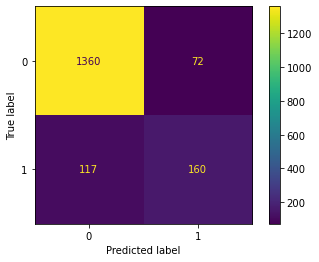

In [21]:
plot_confusion_matrix(POS_grid_NB.best_estimator_, count_test_pos.toarray(), y_test_pos)

In [22]:
#compare parameters
results = pd.DataFrame.from_dict(NB_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\NB_count_results.csv",
               index=True)

In [23]:
results

,precision,recall,macro_f1
Default NB,0.307252,0.581227,0.609482
Grid NB,0.667774,0.725632,0.816765
Default NB with POS,0.318605,0.494585,0.613917
Grid Search NB with POS,0.689655,0.577617,0.781856
